# Python
This is the second Notebook of the final project

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# Question 1:
Write a python program that gets at number from decimal base and prints it in binary, octal, and hex

for this we will just get a number and use the built in bin , oct and hex functions of python to convert from decimal to each base

also each function places a string at the start of the number to show at which base it is shown so we just replace it with an empty string

In [3]:
numToConvert = input("enter a number: ")
print("num in decimal = " + str(numToConvert))
numInBin = bin(int(numToConvert))
print("num in binary = " + str(numInBin).replace("0b",""))
numInHex = hex(int(numToConvert))
print("num in Hex = " + str(numInHex).replace("0x",""))
numInOctal = oct(int(numToConvert))
print("num in Octal = " + str(numInOctal).replace("0o",""))

enter a number: 1234
num in decimal = 1234
num in binary = 10011010010
num in Hex = 4d2
num in Octal = 2322


# Part 2:
In this part we work on the cast DataSet given to us

just load it up using pandas read_csv function


In [8]:
dfCast = pd.read_csv("D:\dataFrames\cast.csv")
dfCast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# Question 2.1: How many movies have the title "Hamlet"?

First of all we will use the loc function on our DataSet to get all the movies that are titled Hamlet.

Then we have a dataset that contains all of the actors ever played for a movie called Hamlet, but we only want 1 instance of each movie, so we use the groupby method to group them by the year they were made.

Then we have a groupby object that has all of the years in which a Hamlet movie was releasad so we just count how many years we have and that is the amount of movies names Hamlet

In [9]:
dfHamlet = dfCast.loc[dfCast["title"] == "Hamlet"]
dfsameYear = dfHamlet.groupby(dfHamlet['year'])
count = 0
for movie in dfsameYear:
    count = count+1
print("there are " + str(count) + " movies named hamlet") 

there are 17 movies named hamlet


# Question 2.2: List all of the "Treasure Island" movies from earliest to most recent.

We will use the loc method to get all the movies titled "Treasure Island" from our cast DataSet

we will then use the sort_values function to sort it by year and the drop_duplicets function to drop all of the instences of movies from the same year

In [11]:
dfTreasureIsland = dfCast.loc[dfCast["title"] == "Treasure Island"]
dfSortedByYear = dfTreasureIsland.sort_values(by=["year"])
df= dfSortedByYear.drop_duplicates(subset=['year'])
df

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
1404517,Treasure Island,1920,Bull Montana,actor,Morgan,8.0
926924,Treasure Island,1934,Olin Howland,actor,Pirate of the Spanish Main,13.0
1979467,Treasure Island,1950,Basil Sydney,actor,Captain Smollett,3.0
961365,Treasure Island,1972,V?ctor Israel,actor,Morgan,14.0
1954811,Treasure Island,1973,Larry Storch,actor,Captain Smollett,5.0
1137587,Treasure Island,1985,Martin Landau,actor,The Captain,2.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


# Question 2.3:How many roles were credited in the silent 1921 version of Hamlet?

We will use the DataFrame with all the Hamlet movies from before and will use loc method to take only the actors from 
the 1921 version of Hamlet and we will use the shape of the DataFrame to get the number of actors

In [17]:
df1921 = dfHamlet.loc[dfHamlet["year"] == 1921]
df1921 = df1921.sort_values(by = ['n'])
print(str(df1921.shape[0])+ " roles were credited in the 1921 version of hamlet")
df1921

9 roles were credited in the 1921 version of hamlet


,title,year,name,type,character,n
2964897,Hamlet,1921,Asta Nielsen,actress,Hamlet,1.0
408456,Hamlet,1921,Paul Conradi,actor,K?nig Hamlet,2.0
2370048,Hamlet,1921,Mathilde Brandt,actress,K?nigin Gertrude,3.0
2116906,Hamlet,1921,Eduard von Winterstein,actor,Claudius,4.0
1948795,Hamlet,1921,Heinz Stieda,actor,Horatio,5.0
1015046,Hamlet,1921,Hans Junkermann,actor,Polonius,6.0
495468,Hamlet,1921,Anton De Verdier,actor,Laertes,7.0
2713980,Hamlet,1921,Lilly Jacobson,actress,Ophelia,8.0
6710,Hamlet,1921,Fritz Achterberg,actor,"Fortinbras,",9.0


# Question 2.4: Use groupby() to plot the number of "Hamlet" films made each decade

First of all we will use groupby do get 1 instence of Hamlet movie from each year, then create a array the size of the groupby object (we know it is 17 from a previous question), we then loop over every index(year) and take down the singels digit and replace it later with a 0 so that we can get the amount of movies from each decade. Then we will use ply.hist() on our array to show the distribution of the movies over the decades

(array([3., 1., 0., 1., 1., 2., 2., 1., 2., 4.]),
 array([1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990.,
        2000., 2010.]),
 <a list of 10 Patch objects>)

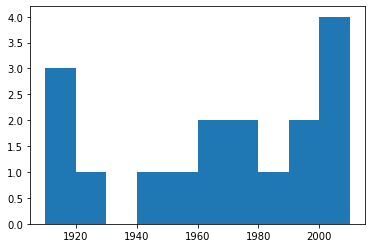

In [20]:
dfsameYear = dfHamlet.groupby(dfHamlet['year'])
y = np.arange(17)
i = 0;
for index in dfsameYear.describe().index:
    y[i] = index/10
    i = i +1
#we mulitply it all by 10 to get the decades
y= y*10
plt.hist(y)

# Question 2.5: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

First we will use loc to get all the movies between 1950 and 1959.

Then we will create an array for leading actor and actress roles, the cell represents the year [0] = 1950,[1] = 1951 and so on

we will go over all the index of movies from our DataFrame and every time we will get n=1 we will figure out if its an actor or actress and then increse the respective index in the array by 1

then we will print our results by loopoing on the arrays

In [22]:
df1950s = dfCast.loc[ dfCast["year"] > 1949]
df1950s = df1950s.loc[df1950s["year"] < 1960]
leadingActorsCount = np.zeros(10)
leadingActressesCount = np.zeros(10)
for index in df1950s.index:
    if((df1950s['n'][index] == 1 )):
        year = df1950s['year'][index]
        num_of_year = year%10
        if(df1950s['type'][index] == "actor"):
            leadingActorsCount[num_of_year] = leadingActorsCount[num_of_year] +1
        elif(df1950s['type'][index] == "actress"):
            leadingActressesCount[num_of_year] = leadingActressesCount[num_of_year] +1
for i in range(10):
    print("there were " + str(leadingActorsCount[i]) + " avialable lead roles for actors in " + str(1950+i))
    print("there were " + str(leadingActressesCount[i]) + " avialable lead roles for Actresses in " + str(1950+i))

there were 604.0 avialable lead roles for actors in 1950
there were 271.0 avialable lead roles for Actresses in 1950
there were 633.0 avialable lead roles for actors in 1951
there were 272.0 avialable lead roles for Actresses in 1951
there were 591.0 avialable lead roles for actors in 1952
there were 284.0 avialable lead roles for Actresses in 1952
there were 634.0 avialable lead roles for actors in 1953
there were 290.0 avialable lead roles for Actresses in 1953
there were 626.0 avialable lead roles for actors in 1954
there were 298.0 avialable lead roles for Actresses in 1954
there were 606.0 avialable lead roles for actors in 1955
there were 264.0 avialable lead roles for Actresses in 1955
there were 614.0 avialable lead roles for actors in 1956
there were 288.0 avialable lead roles for Actresses in 1956
there were 708.0 avialable lead roles for actors in 1957
there were 284.0 avialable lead roles for Actresses in 1957
there were 694.0 avialable lead roles for actors in 1958
there w

# Question 2.6: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's

first we will get all the movies made after 1989 using loc.

Then we will use loc again to get only the leading actor or actress from each movie.

We will then use the groupby method to group them by name and take the count so we see how many times each actor showed up in the DataFrame, then we sort the values by the count of movies, remove unesecery columns and change names, and use head to take the top 10 actors

In [28]:
df1990s = dfCast.loc[dfCast['year'] > 1989]
dfLeading = df1990s.loc[dfCast['n'] == 1]
dfMost = dfLeading.groupby(dfLeading['name'])
df10= dfMost.count().sort_values(by = ['title']  , ascending=False).head(10)
df10 = df10.drop(columns= ['year','type','character','n'])
df10 = df10.rename(columns = {'title': 'count of leading roles'})
df10

,count of leading roles
name,
Mohanlal,126
Mammootty,118
Akshay Kumar,87
Jayaram,76
Andy Lau,72
Ajay Devgn,69
Amitabh Bachchan,68
Eric Roberts,68
Nagarjuna Akkineni,60


# Question 2.7: List, in order by year, each of the films in which Frank Oz has played more than 1 role

First we will use loc to take all the movies in which Frank Oz played a role, we will the groupby all the movies to see in which Frank Oz showed more then once, and loop over then indexes to remove all the movies in which he appread in only 1 role.remove some unesecery columns and change names and print it out

In [29]:
dfFrank = dfCast.loc[dfCast['name'] == "Frank Oz"]
dfFrank = dfFrank.sort_values(by = ['year'])
dfMoreThen1 = dfFrank.groupby(dfFrank["title"])
dfMoreThen1= dfMoreThen1['year']
dfMoreThen1 = dfMoreThen1.describe().sort_values(by = ['count'], ascending=False)
for ind in dfMoreThen1.index:
    if(dfMoreThen1['count'][ind] == 1):
        dfMoreThen1 = dfMoreThen1.drop(index = ind)
dfMoreThen1 = dfMoreThen1.drop(columns= ['std','min','25%','50%','75%','max'])
dfMoreThen1 = dfMoreThen1.rename(columns = {'mean': 'year'})
dfMoreThen1 = dfMoreThen1.sort_values(by = ['year'])
dfMoreThen1

,count,year
title,,
The Muppet Movie,8.0,1979.0
The Great Muppet Caper,6.0,1981.0
An American Werewolf in London,2.0,1981.0
The Dark Crystal,2.0,1982.0
The Muppets Take Manhattan,7.0,1984.0
Sesame Street Presents: Follow that Bird,3.0,1985.0
The Muppet Christmas Carol,7.0,1992.0
Muppet Treasure Island,4.0,1996.0
Muppets from Space,4.0,1999.0
